In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from os import listdir
from os.path import join, isfile
from queue import Queue
from threading import Thread, Lock
from time import time
from colorsys import rgb_to_hls

from random import randrange

IMAGES_DIR = join('..', 'imgs')

INPUT_DIR = join(IMAGES_DIR, '04.Sized')
OUTPUT_FILE = 'MUMI-organized.json'

CV_KMEANS_CRITERIA = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
CV_KMEANS_K = 8

input_files = sorted([f for f in listdir(INPUT_DIR) if f.lower().startswith("mumi") and f.lower().endswith(".jpg")])


In [3]:
# file_path = join(INPUT_DIR, 'MUMI-353-Berilo-Goshenita.jpg')
# file_path = join(INPUT_DIR, 'MUMI-462-Elbaíta, var.Indicolita.jpg')
# file_path = join(INPUT_DIR, 'MUMI-373-Esmeralda.jpg')
# file_path = join(INPUT_DIR, 'MUMI-789-2-Quartzo fumê catedral.jpg')
file_path = join(INPUT_DIR, input_files[randrange(len(input_files))])

image = cv2.imread(file_path)
image = cv2.resize(image, (0,0), fx=0.25, fy=0.25)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [22]:
pixel_values = np.float32(image.reshape((-1, 3)))
_, labels, centers = cv2.kmeans(pixel_values, CV_KMEANS_K, None, CV_KMEANS_CRITERIA, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
_, counts = np.unique(labels, return_counts=True)
dominant = centers[np.argmax(counts)]


[95, 88, 69]

In [5]:
def tohsl(row):
    return list(rgb_to_hls(*row))

centers_hsl = np.apply_along_axis(tohsl, 1, centers / [255, 255, 255])


In [6]:
high_by_col = np.argmax(centers_hsl, axis=0)

In [7]:
high_colors = centers[high_by_col]


In [8]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

In [9]:
dominant_color_image = np.full(shape=labels.flatten().shape, fill_value=np.argmax(counts))

dominant_color_image = centers[dominant_color_image]
dominant_color_image = dominant_color_image.reshape(image.shape)


In [10]:
dominant_hue_image = np.full(shape=labels.flatten().shape, fill_value=high_by_col[0])

dominant_hue_image = centers[dominant_hue_image]
dominant_hue_image = dominant_hue_image.reshape(image.shape)


In [11]:
dominant_light_image = np.full(shape=labels.flatten().shape, fill_value=high_by_col[1])

dominant_light_image = centers[dominant_light_image]
dominant_light_image = dominant_light_image.reshape(image.shape)


In [12]:
dominant_saturation_image = np.full(shape=labels.flatten().shape, fill_value=high_by_col[2])

dominant_saturation_image = centers[dominant_saturation_image]
dominant_saturation_image = dominant_saturation_image.reshape(image.shape)


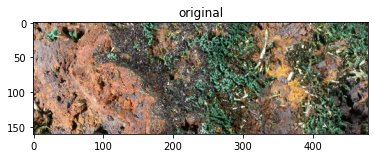

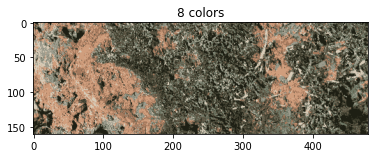

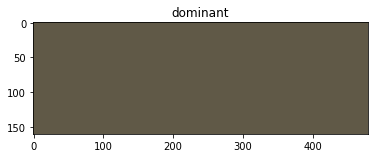

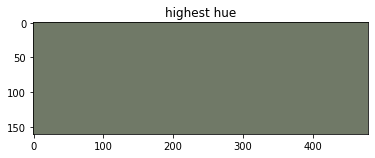

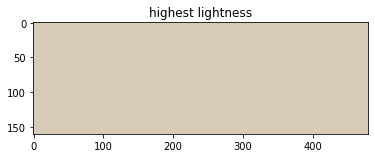

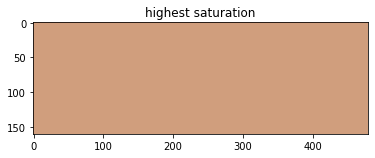

In [13]:
plt.imshow(image)
plt.title('original')
plt.show()

plt.imshow(segmented_image)
plt.title('%i colors' % CV_KMEANS_K)
plt.show()

plt.imshow(dominant_color_image)
plt.title('dominant')
plt.show()

plt.imshow(dominant_hue_image)
plt.title('highest hue')
plt.show()

plt.imshow(dominant_light_image)
plt.title('highest lightness')
plt.show()

plt.imshow(dominant_saturation_image)
plt.title('highest saturation')
plt.show()

